In [25]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import math
import pandas

# dimension N
N = 2 
mu_par = 0.85

distributed = False  # discrete and distributed delays

b = -1.41 #0.1 #0.1
c = -1.41 #0.005 #0.05

# multi-dimensional system
A = np.array([[1,0],[0,1]])
W11 = np.array([[b,0],[0,0]])
W12 = np.array([[0,b],[0,0]])
W13 = np.array([[0,0],[b,0]])
W14 = np.array([[0,0],[0,b]])
W21 = np.array([[c,0],[0,0]])
W22 = np.array([[0,c],[0,0]])
W23 = np.array([[0,0],[c,0]])
W24 = np.array([[0,0],[0,c]])

In [26]:
# activation function
def g(x):
    return np.transpose(np.array([math.tanh(x[0]),math.tanh(x[1])]))

tau1 = 13*math.pi/12
tau2 = 11*math.pi/12
tau3 = 7*math.pi/12
tau4 = 5*math.pi/12
tau_max = 13*math.pi/12

h1 = math.pi/12
h2 = math.pi/12
h3 = math.pi/12
h4 = math.pi/12
h_min = math.pi/12

In [27]:
# maximal value of the time scale
m = 500

# function of density of time scale
def mu_nonuniform(t):
    if t==0:
        return 0.1
    else:
        return #0.1 #0.01*t 

def mu(t):
    global mu_par
    return mu_par #0.3 #0.4 #0.5 #0.6 #0.7 #0.8 #0.9 #1 #0.1 #0.05 #0.2 
    
# time scale
t = 0
T = [0]
while t<m:
    t = t + mu(t)
    T.append(t)

In [28]:
x0 = [10,1]                      # initial amount

x = np.zeros((2,len(T)))
x.shape
type(x)
x[:,8]

array([0., 0.])

In [29]:
def hat_sigma(t):
    return min([s for s in T if s >= t])

def xlag(t):
    if t<0:
        return x0
    else:
        return np.transpose(np.array(x[:,T.index(hat_sigma(t))]))

def integr_g(x,tmin,tmax):
    subscale = [s for s in T if (s>=tmin)&(s<=tmax)]
    subscale = sorted(subscale)
    integr = [0,0]
    for t in subscale:
        integr = integr + g(xlag(t))*mu(t)
    return integr

# recurrent function
def recur(x,t):
    return xlag(t-mu(t)) + mu(t)*(-A.dot(xlag(t-mu(t))) + W11.dot(g(xlag(t-tau1))) + W12.dot(g(xlag(t-tau2))) 
                      + W13.dot(g(xlag(t-tau3))) + W14.dot(g(xlag(t-tau4))) 
                      + W21.dot(integr_g(x,t-tau1,t-h1)) + W22.dot(integr_g(x,t-tau2,t-h2)) 
                      + W23.dot(integr_g(x,t-tau3,t-h3)) + W24.dot(integr_g(x,t-tau4,t-h4)))

def recur_mu(x,t,u):
    # discrete and distributed delays
    global mu_par
    mu_par = u
    if(distributed == False):
        return xlag(t-mu(t)) + mu(t)*(-A.dot(xlag(t-mu(t))) + W11.dot(g(xlag(t-tau1))) + W12.dot(g(xlag(t-tau2))) 
                                      + W13.dot(g(xlag(t-tau3))) + W14.dot(g(xlag(t-tau4))))
    else:
        return xlag(t-mu(t)) + mu(t)*(-A.dot(xlag(t-mu(t))) + W11.dot(g(xlag(t-tau1))) + W12.dot(g(xlag(t-tau2))) 
                      + W13.dot(g(xlag(t-tau3))) + W14.dot(g(xlag(t-tau4))) 
                      + W21.dot(integr_g(x,t-tau1,t-h1)) + W22.dot(integr_g(x,t-tau2,t-h2)) 
                      + W23.dot(integr_g(x,t-tau3,t-h3)) + W24.dot(integr_g(x,t-tau4,t-h4)))

In [30]:
# Compute solution with usual recur function
x[:,0] = x0
for t in T[1:]:
    x[:,T.index(t)] = recur_mu(x,t,mu_par)

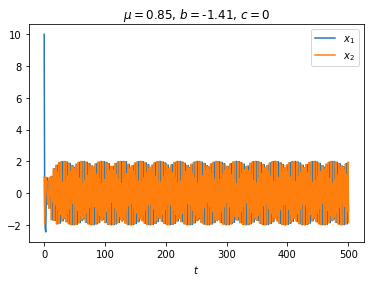

In [31]:
#plt.plot(index_set, x, 'ro', xlabel='years', ylabel='amount')
plt.plot(T, x[0], label=r'$x_1$')
plt.plot(T, x[1], label=r'$x_2$')
plt.xlabel(r'$t$')
plt.legend(loc="upper right")
#plt.show()
if(distributed == False):
    plt.title(r'$\mu=${0}, $b=${1}, $c=0$'.format(mu_par,b,c))
    plt.savefig("Plots_RNN/x1vstmu{0}b{1}c0.png".format(mu_par,b,c))
else:    
    plt.title(r'$\mu=${0}, $b=${1}, $c=${2}'.format(mu_par,b,c))
    plt.savefig("Plots_RNN/x1vstmu{0}b{1}c{2}.png".format(mu_par,b,c))

In [32]:
round(x.shape[1]/3)
#x[0,100:]

197

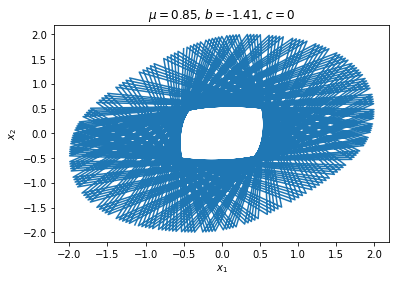

In [33]:
#plt.plot(x[0],x[1])
plt.plot(x[0,round(x.shape[1]/1.5):],x[1,round(x.shape[1]/1.5):])
if(distributed == False):
    plt.title(r'$\mu=${0}, $b=${1}, $c=0$'.format(mu_par,b,c))
else:    
    plt.title(r'$\mu=${0}, $b=${1}, $c=${2}'.format(mu_par,b,c))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
#plt.show()
if(distributed == False):
    plt.title(r'$\mu=${0}, $b=${1}, $c=0$'.format(mu_par,b,c))
    plt.savefig("Plots_RNN/x1vsx2mu{0}b{1}c0.png".format(mu_par,b,c))
else:    
    plt.title(r'$\mu=${0}, $b=${1}, $c=${2}'.format(mu_par,b,c))
    plt.savefig("Plots_RNN/x1vsx2mu{0}b{1}c{2}.png".format(mu_par,b,c))

In [48]:
# plotting with ggplot2
# tutorial from https://towardsdatascience.com/how-to-use-ggplot2-in-python-74ab8adec129
# Using pip
# ! pip install plotnine         

# Using conda
# ! conda install -c conda-forge plotnine

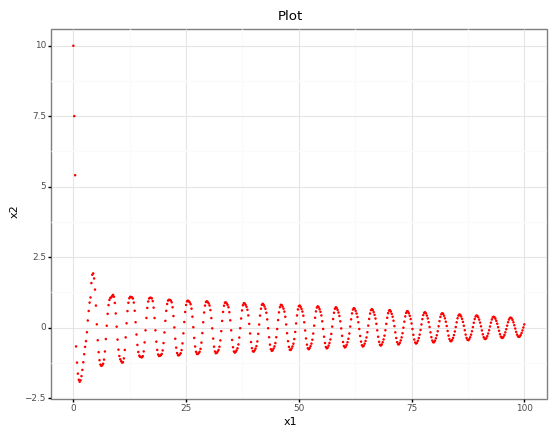

<ggplot: (145622148024)>

In [49]:
%matplotlib inline
from plotnine import *
df = pandas.DataFrame({'T':T,'x1':x[0,:],'x2':x[1,:]})
#df.columns = ['T','x1','x2']
(ggplot(df)
 + aes(x='T', y='x1')
 + geom_point(size=0.01,color='red')
 + labs(title='Plot', x='x1', y='x2')
 + theme_bw(base_size = 8)
)

In [23]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!ATTENTION!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Bifurcation diagram of the RNN with recur_mu
# https://stackoverflow.com/questions/47021057/bifurcation-diagram-with-python/47023163
import matplotlib.pyplot as plt
import numpy as np
P=np.linspace(0.01,1,10000)
x0 = x0
# Initialize your data containers identically
X = []
Y1 = []
Y2 = []
# l is never used, I removed it.
for u in P:
    print(u)
    # Add one value to X instead of resetting it.
    X.append(u)
    # Start with a random value of m instead of remaining stuck
    # on a particular branch of the diagram
    x0 = [np.random.random(),np.random.random()]
    x[:,0] = x0
    for t in T[1:1001]:
        x[:,T.index(t)] = recur_mu(x,t,u)  
      #m=(u*m)*(1-m)
    # The break is harmful here as it prevents completion of
    # the loop and collection of data in Y 
    for t in T[1:1051]:
        x[:,T.index(t)] = recur_mu(x,t,u)
        Y1val = x[0,T.index(t)]
        Y2val = x[1,T.index(t)]        
    # Collection of data in Y must be done once per value of u
    Y1.append(Y1val)
    Y2.append(Y2val)    
    #Y.append(x[:,x[0].shape[0]-1])
# Remove the line between successive data points, this renders
# the plot illegible. Use a small marker instead.
#plt.plot(X, Y, ls='', marker=',')
#plt.show()

0.01
0.0100990099009901
0.010198019801980198
0.010297029702970298
0.010396039603960397
0.010495049504950496
0.010594059405940595
0.010693069306930694
0.010792079207920793
0.01089108910891089
0.01099009900990099
0.011089108910891089
0.011188118811881188
0.011287128712871287
0.011386138613861386
0.011485148514851485
0.011584158415841584
0.011683168316831683
0.011782178217821782
0.011881188118811881
0.01198019801980198
0.01207920792079208
0.012178217821782179
0.012277227722772278
0.012376237623762377
0.012475247524752476
0.012574257425742575
0.012673267326732674
0.012772277227722773
0.012871287128712872
0.01297029702970297
0.013069306930693069
0.013168316831683168
0.013267326732673267
0.013366336633663366
0.013465346534653465
0.013564356435643564
0.013663366336633663
0.013762376237623762
0.013861386138613862
0.01396039603960396
0.01405940594059406
0.014158415841584157
0.014257425742574256
0.014356435643564355
0.014455445544554454
0.014554455445544554
0.014653465346534653
0.014752475247524

In [32]:
len(Y1)

10000

In [14]:
plt.plot(X, Y1, ls='', marker=',')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$x_1$')
#plt.show()
if(distributed == False):
    plt.title(r'$b=${1}, $c=0$'.format(mu_par,b,c))
    plt.savefig("Plots_RNN/Y1_bif_diagr_discrete.png")
else:
    plt.title(r'$b=${1}, $c=${2}'.format(mu_par,b,c))
    plt.savefig("Plots_RNN/Y1_bif_diagr.png")

NameError: name 'X' is not defined

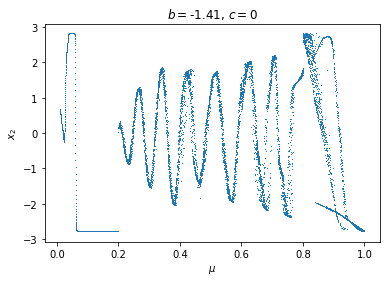

In [65]:
plt.plot(X, Y2, ls='', marker=',')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$x_2$')
#plt.show()
if(distributed == False):
    plt.title(r'$b=${1}, $c=0$'.format(mu_par,b,c))
    plt.savefig("Plots_RNN/Y2_bif_diagr_discrete.png")
else:
    plt.title(r'$b=${1}, $c=${2}'.format(mu_par,b,c))
    plt.savefig("Plots_RNN/Y2_bif_diagr.png")

In [27]:
# save bifurcation data as csv 
import csv

header = ['X', 'Y1', 'Y2']
data = [
    X,
    Y1,
    Y2
]
# transpose the data
data_array = np.array(data)
transpose = data_array.T
data = transpose.tolist()

if(distributed == False):
    with open('bifurcation_diagrams_discrete.csv', 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)

        # write the header
        writer.writerow(header)

        # write multiple rows
        writer.writerows(data)
else:
    with open('bifurcation_diagrams.csv', 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)

        # write the header
        writer.writerow(header)

        # write multiple rows
        writer.writerows(data)

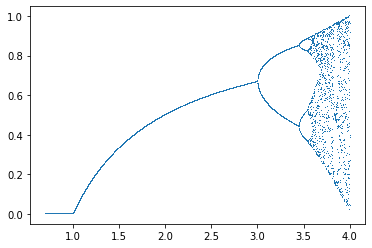

In [322]:
# Bifurcation diagram 1 of the logistic map
import matplotlib.pyplot as plt
import numpy as np
P=np.linspace(0.7,4,10000)
m=0.7
# Initialize your data containers identically
X = []
Y = []
# l is never used, I removed it.
for u in P:
    # Add one value to X instead of resetting it.
    X.append(u)
    # Start with a random value of m instead of remaining stuck
    # on a particular branch of the diagram
    m = np.random.random()
    for n in range(1001):
      m=(u*m)*(1-m)
    # The break is harmful here as it prevents completion of
    # the loop and collection of data in Y 
    for l in range(1051):
      m=(u*m)*(1-m)
    # Collection of data in Y must be done once per value of u
    Y.append(m)
# Remove the line between successive data points, this renders
# the plot illegible. Use a small marker instead.
plt.plot(X, Y, ls='', marker=',')
plt.show()

In [277]:
# Bifurcation diagram 2 of the logistic map

import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 2.9
xb = 4.0
maxit = 1000

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = r * x * (1 - x)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("Bifurcation.png", "PNG")